In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
salary = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


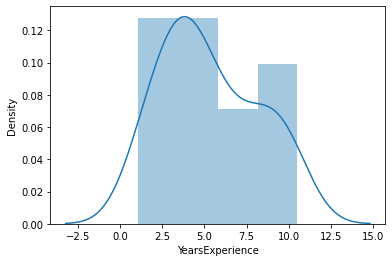

In [6]:
sns.distplot(salary['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


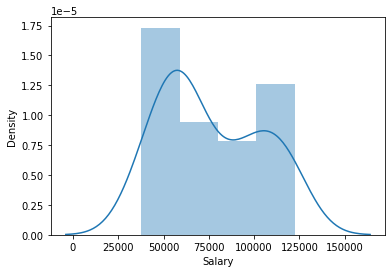

In [7]:
sns.distplot(salary['Salary'])

In [8]:
model = smf.ols("Salary~YearsExperience",data = salary).fit()

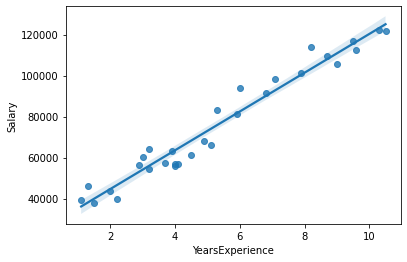

In [9]:
sns.regplot(x="YearsExperience", y="Salary", data=salary);

In [10]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Model Prediciton

In [13]:
# Manually predicting for 3 years experience
Salary = 25792.200199 +  9449.962321 * 3
Salary

54142.087162

In [14]:
# Automatic Prediction for say 3 & 5 years exp
newdata = pd.Series([3,5])

In [15]:
data_pred = pd.DataFrame(newdata, columns=['YearsExperience'])

In [16]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

## Applying Transformation

In [18]:
salary1 = pd.read_csv('/content/Salary_Data.csv')
salary1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### log

In [19]:
salary1['Salary'] = np.log10(salary1['Salary'])
salary1

,YearsExperience,Salary
0,1.1,4.594867
1,1.3,4.664689
2,1.5,4.576698
3,2.0,4.638739
4,2.2,4.600875
5,2.9,4.753139
6,3.0,4.779236
7,3.2,4.735958
8,3.2,4.809189
9,3.7,4.757313


In [20]:
newdata1 = pd.DataFrame(salary1.Salary)

In [21]:
model1 = smf.ols("YearsExperience~Salary",data = salary1).fit()

In [22]:
model1.predict(newdata1)

0     0.901345
1     2.095676
2     0.590552
3     1.651785
4     1.004105
5     3.608650
6     4.055053
7     3.314768
8     4.567424
9     3.680047
10    4.424619
11    3.496591
12    3.649849
13    3.666005
14    4.172803
15    4.959542
16    4.747810
17    6.454999
18    6.299145
19    7.366932
20    7.190723
21    7.701920
22    7.927435
23    8.792461
24    8.500852
25    8.234853
26    8.995721
27    8.715235
28    9.332335
29    9.300766
dtype: float64

### sqrt


In [24]:
salary2 = pd.read_csv('/content/Salary_Data.csv')
salary2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
salary2['Salary'] = np.sqrt(salary2['Salary'])
salary2

,YearsExperience,Salary
0,1.1,198.350700
1,1.3,214.953483
2,1.5,194.244691
3,2.0,208.626460
4,2.2,199.727314
5,2.9,237.995798
6,3.0,245.254969
7,3.2,233.334524
8,3.2,253.860198
9,3.7,239.142217


In [26]:
newdata2 = pd.DataFrame(salary2.Salary)

In [27]:
model2 = smf.ols("YearsExperience~Salary",data = salary2).fit()

In [28]:
model2.predict(newdata2)

0     1.249452
1     2.174019
2     1.020799
3     1.821683
4     1.326112
5     3.457188
6     3.861433
7     3.197613
8     4.340636
9     3.521029
10    4.205411
11    3.357604
12    3.493990
13    3.508449
14    3.970103
15    4.718698
16    4.513317
17    6.255712
18    6.088210
19    7.271810
20    7.070583
21    7.661005
22    7.927999
23    8.990549
24    8.625419
25    8.298549
26    9.249327
27    8.893154
28    9.685747
29    9.644396
dtype: float64